# Hierarchical clustering analysis

In [1]:
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read dataset
df_01_scaled = pd.read_csv('../data/HR_comma_sep_01_scaled.csv', index_col=0)

In [3]:
# choice of attributes
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
train_data = df_01_scaled[numerical_features].values

In [4]:
# distance matrix
data_dist = pdist(train_data, metric='euclidean')

In [5]:
# compute hierarchical clustering
methods = ['single', 'complete', 'average', 'centroid', 'ward']
data_links = dict()
for m in methods:
    data_links[m] = linkage(data_dist, method=m, metric='euclidean')

In [16]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
pd.DataFrame(data_links['single'])

,0,1,2,3
0,0.0,12000.0,0.000000,2.0
1,14211.0,14999.0,0.000000,3.0
2,242.0,12242.0,0.000000,2.0
3,14453.0,15001.0,0.000000,3.0
4,1883.0,14919.0,0.000000,2.0
5,507.0,12507.0,0.000000,2.0
6,14718.0,15004.0,0.000000,3.0
7,589.0,12589.0,0.000000,2.0
8,14800.0,15006.0,0.000000,3.0
9,1915.0,14951.0,0.000000,2.0


## dendograms

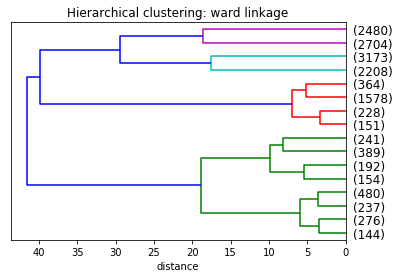

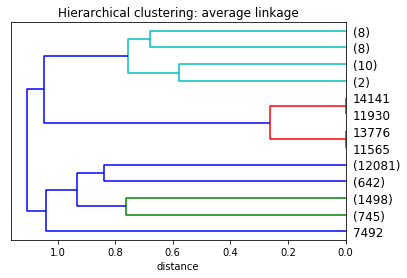

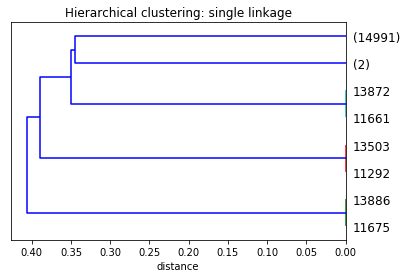

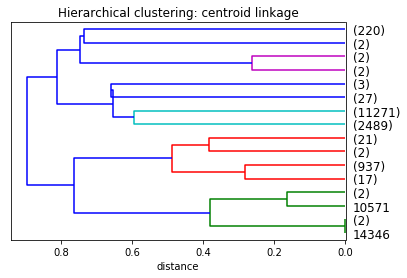

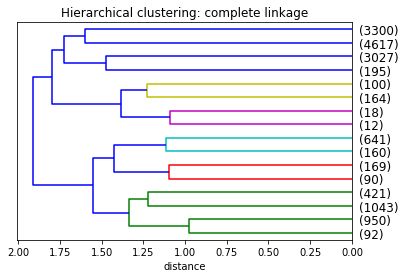

In [35]:
# plot dendograms
for method in data_links:
    res = dendrogram(data_links[method], p=3, truncate_mode='level', orientation='left') #p=lev to show, truncate_mode=lastp/level
    plt.xlabel('distance')
    plt.title('Hierarchical clustering: ' + method + ' linkage')
    plt.savefig('../images/hierarchical_clustering_' + method + '.png')
    plt.show()

### performance of 'ward', 'complete' and 'average'

In [4]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [10]:
# hierarchical clustering
connectivity = kneighbors_graph(train_data, n_neighbors=1, mode='distance', include_self=False, n_jobs=-1)
connectivity = 0.5 * (connectivity + connectivity.T)
connectivity

<14999x14999 sparse matrix of type '<type 'numpy.float64'>'
	with 14508 stored elements in Compressed Sparse Row format>

In [ ]:
# unstructured HAC algorithm
connectivity=None

#### ward

In [7]:
print 'ward'
for i in range(2, 10):
    ward = AgglomerativeClustering(n_clusters=i, linkage='ward', affinity='euclidean',
                                   connectivity=connectivity)
    ward.fit(train_data)

    hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
    print i, 'clusters:'
    print 'labels', dict(zip(bins, hist))
    print 'silhouette', silhouette_score(train_data, ward.labels_)

ward
2 clusters:
labels {0: 12562, 1: 2437}
silhouette 0.294771689633
3 clusters:
labels {0: 10469, 1: 2437, 2: 2093}
silhouette 0.251543489817
4 clusters:
labels {0: 6219, 1: 2437, 2: 2093, 3: 4250}
silhouette 0.202635788767
5 clusters:
labels {0: 2437, 1: 2189, 2: 2093, 3: 4250, 4: 4030}
silhouette 0.204409826241
6 clusters:
labels {0: 2189, 1: 4250, 2: 2093, 3: 1556, 4: 4030, 5: 881}
silhouette 0.209425216512
7 clusters:
labels {0: 4250, 1: 4030, 2: 556, 3: 1556, 4: 1633, 5: 881, 6: 2093}
silhouette 0.209807956909
8 clusters:
labels {0: 4030, 1: 1556, 2: 556, 3: 2429, 4: 1633, 5: 881, 6: 2093, 7: 1821}
silhouette 0.203858957081
9 clusters:
labels {0: 1556, 1: 2093, 2: 556, 3: 2429, 4: 1633, 5: 881, 6: 2093, 7: 1821, 8: 1937}
silhouette 0.201914504692


#### complete

#### complete

In [8]:
print 'complete'
for i in range(2, 10):
    ward = AgglomerativeClustering(n_clusters=i, linkage='complete', affinity='euclidean',
                                   connectivity=connectivity)
    ward.fit(train_data)

    hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
    print i, 'clusters:'
    print 'labels', dict(zip(bins, hist))
    print 'silhouette', silhouette_score(train_data, ward.labels_)

complete
2 clusters:
labels {0: 14995, 1: 4}
silhouette 0.347698583237
3 clusters:
labels {0: 14994, 1: 4, 2: 1}
silhouette 0.306628163968
4 clusters:
labels {0: 14993, 1: 4, 2: 1, 3: 1}
silhouette

/home/carlo/anaconda2/lib/python2.7/site-packages/sklearn/metrics/cluster/unsupervised.py:205: RuntimeWarning: invalid value encountered in divide
  sil_samples /= np.maximum(intra_clust_dists, inter_clust_dists)


 0.306727358737
5 clusters:
labels {0: 2867, 1: 12126, 2: 1, 3: 1, 4: 4}
silhouette -0.0139968591383
6 clusters:
labels {0: 2262, 1: 12126, 2: 605, 3: 1, 4: 4, 5: 1}
silhouette -0.0327341291056
7 clusters:
labels {0: 419, 1: 12126, 2: 605, 3: 1, 4: 4, 5: 1, 6: 1843}
silhouette -0.0509212944172
8 clusters:
labels {0: 605, 1: 12126, 2: 1843, 3: 413, 4: 4, 5: 1, 6: 6, 7: 1}
silhouette -0.0572874424966
9 clusters:
labels {0: 1843, 1: 12126, 2: 6, 3: 413, 4: 4, 5: 1, 6: 595, 7: 1, 8: 10}
silhouette -0.0612945812045


#### average

In [9]:
print 'average'
for i in range(2, 10):
    ward = AgglomerativeClustering(n_clusters=i, linkage='average', affinity='euclidean',
                                   connectivity=connectivity)
    ward.fit(train_data)

    hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
    print i, 'clusters:'
    print 'labels', dict(zip(bins, hist))
    print 'silhouette', silhouette_score(train_data, ward.labels_)

average
2 clusters:
labels {0: 14995, 1: 4}
silhouette 0.347698583237
3 clusters:
labels {0: 32, 1: 4, 2: 14963}
silhouette 0.290169475394
4 clusters:
labels {0: 12, 1: 20, 2: 14963, 3: 4}
silhouette 0.276803686266
5 clusters:
labels {0: 14963, 1: 20, 2: 4, 3: 4, 4: 8}
silhouette 0.267019147179
6 clusters:
labels {0: 20, 1: 14955, 2: 8, 3: 4, 4: 8, 5: 4}
silhouette 0.237189633953
7 clusters:
labels {0: 14955, 1: 10, 2: 8, 3: 4, 4: 8, 5: 4, 6: 10}
silhouette 0.221417838114
8 clusters:
labels {0: 14952, 1: 10, 2: 8, 3: 4, 4: 8, 5: 4, 6: 10, 7: 3}
silhouette 0.201569989751
9 clusters:
labels {0: 14950, 1: 10, 2: 8, 3: 4, 4: 8, 5: 4, 6: 10, 7: 3, 8: 2}
silhouette 0.149081009941


### annotated dendograms

In [33]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            y = 0.5 * sum(i[1:3])
            x = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate(np.round(x,2), (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axvline(x=max_d, c='k')
    return ddata

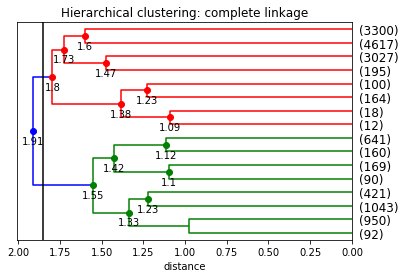

In [39]:
method='complete'
res = fancy_dendrogram(data_links[method], p=3, truncate_mode='level', orientation='left',
                annotate_above=10, max_d=1.85)
plt.xlabel('distance')
plt.title('Hierarchical clustering: ' + method + ' linkage')
plt.savefig('../images/hierarchical_clustering_' + method + '-annotated.png')
plt.show()

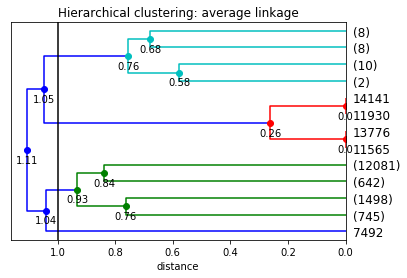

In [40]:
method='average'
res = fancy_dendrogram(data_links[method], p=3, truncate_mode='level', orientation='left',
                annotate_above=10, max_d=1)
plt.xlabel('distance')
plt.title('Hierarchical clustering: ' + method + ' linkage')
plt.savefig('../images/hierarchical_clustering_' + method + '-annotated.png')
plt.show()

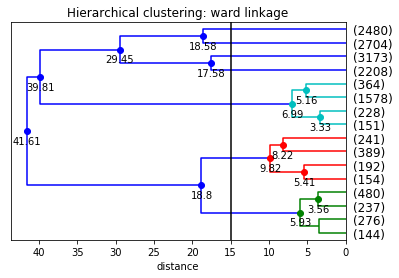

In [41]:
method='ward'
res = fancy_dendrogram(data_links[method], p=3, truncate_mode='level', orientation='left',
                annotate_above=10, max_d=15)
plt.xlabel('distance')
plt.title('Hierarchical clustering: ' + method + ' linkage')
plt.savefig('../images/hierarchical_clustering_' + method + '-annotated.png')
plt.show()